In [131]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [132]:
from fastai import *
from fastai.vision import *
from functools import partial
from callbacks import SaveEveryNIterations, StopAfterNIterations, GradientAccumulator

## Setting up model for experimentation

In [133]:
PATH = Path('/Users/akash/Desktop/AI/Deep learning/GitHub Uploads/Donkeys vs Horses/data')
def get_data(bs=16, size=224):
    data = (ImageItemList.from_folder(path=PATH)
            .filter_by_folder(include=['Donkey', 'Horse'])
            .random_split_by_pct(0.2)
            .label_from_folder()
            .transform(get_transforms(max_warp=0), size=size)
            .databunch(bs=bs)
            .normalize(imagenet_stats))
    return data

<hr>


In [138]:
saver_callback = partial(SaveEveryNIterations, num_iterations=10)
stopper = partial(StopAfterNIterations, num_iterations = 17)
accumulator = partial(GradientAccumulator, num_iterations = 4)

In [119]:
data = get_data(4, 224)

In [139]:
learn = create_cnn(data, models.resnet18, callback_fns = [stopper, accumulator])

In [140]:
learn.metrics.append(accuracy)

In [141]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy


Performing backprop at iteration : 4
Performing backprop at iteration : 8
Performing backprop at iteration : 12
Performing backprop at iteration : 16
Iteration 17 reached. Stopping Training
Run learn.validate(learn.data.valid_dl) to see results


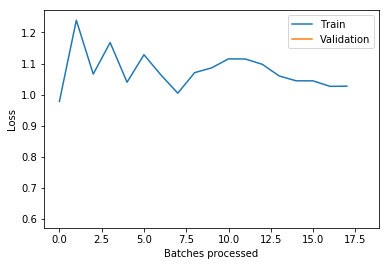

In [142]:
learn.recorder.plot_losses()

In [ ]:
learn.gradient_accumulator

In [126]:
learn.save_every_n_iterations.num_iterations = 3

In [127]:
learn.save_every_n_iterations.num_iterations

3

In [128]:
learn.save_every_n_iterations.disable_callback = True

In [129]:
learn.save_every_n_iterations.disable_callback

True

In [111]:
learn.stop_after_n_iterations.num_iterations = 5
learn.save_every_n_iterations.num_iterations = 3
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy


Model saved as saved_every_10_iterations | Iteration : 10
Iteration 17 reached. Stopping Training
Run learn.validate(learn.data.valid_dl) to see results


In [112]:
learn.stop_after_n_iterations.num_iterations

17

In [ ]:
learn.stop_after_n_iterations.disable_callback = True
learn.save_every_n_iterations.disable_callback = True
learn.fit_one_cycle(1)

In [95]:
print('hello')

hello


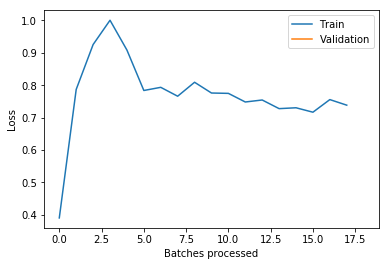

In [79]:
learn.recorder.plot_losses()

In [78]:
learn.validate()

[0.4480532, tensor(0.7882)]